In [1]:
from skimage import color, io, util, filters , morphology
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale
from scipy import fftpack as fp
from helper import *

# Nomor 1

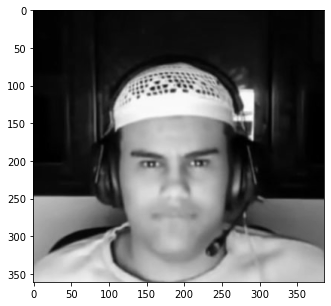

In [2]:
ori_img = color.rgb2gray(io.imread('./fanum_look_alike.jpg', pilmode = 'RGB'))
plt.figure(figsize =(10 , 5))
plt.imshow(ori_img, cmap='gray')
plt.show()

## 1.a. Dalam domain frekuensi

In [3]:
img_ft = fp.fft(ori_img)
ft_norm = abs(img_ft)
ft_scale = np.log(1+ft_norm)
ft_shift = fp.fftshift(ft_scale)

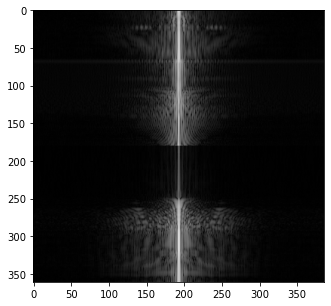

In [4]:
plt.figure(figsize =(10 , 5))
plt.imshow(ft_shift, cmap='gray')
plt.show()

## 1.b Low Pass Filtering

Text(0.5, 1.0, 'Fourier with low ideal filtering')

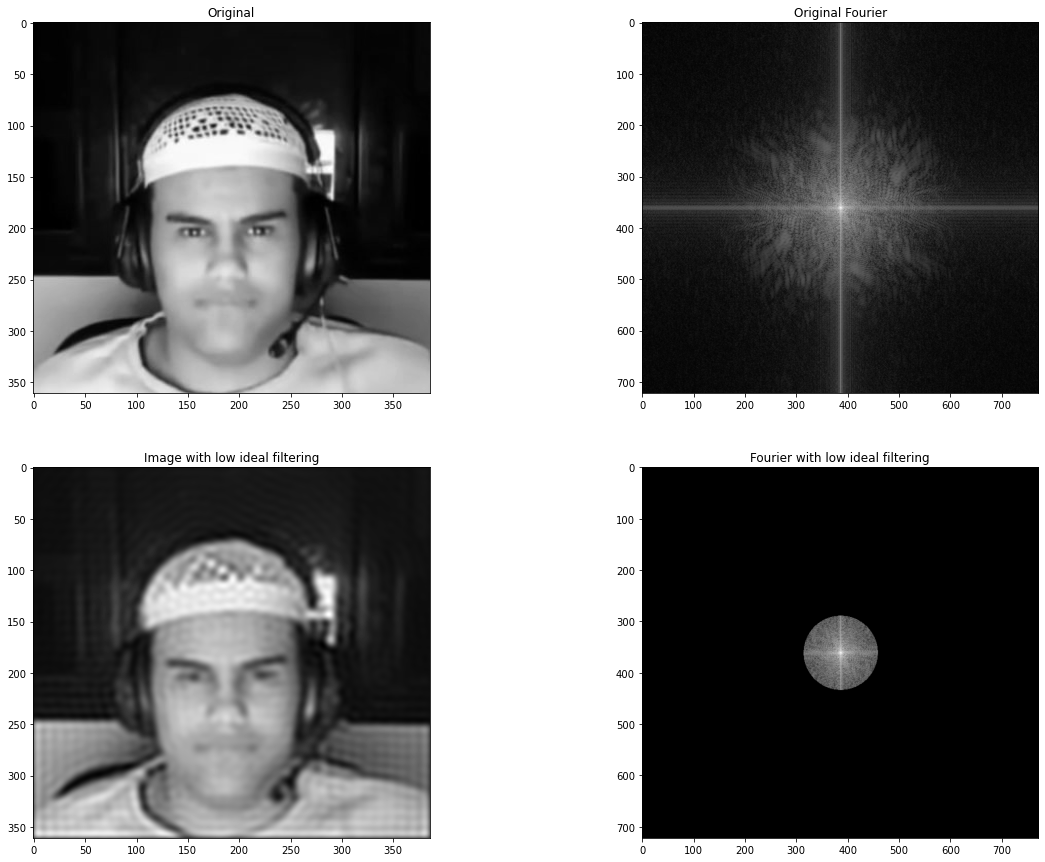

In [19]:
w, l = paddedsize(ori_img.shape[0], ori_img.shape[1])

h = lpfilter('ideal', w, l, 0.1 * w)

f = fp.fft2(ori_img, (w,l))

lowpass_img = h * f

lowp_image = fp.ifft2(lowpass_img).real
lowp_image = lowp_image[:ori_img.shape[0],:ori_img.shape[1]]

fc = fp.fftshift(f)
fcf = fp.fftshift(lowpass_img)

s1 = np.log(1+abs(fc))
s2 = np.log(1+abs(fcf))

plt.figure(figsize =(20 , 15))
plt.subplot(2 , 2, 1); plt.imshow(ori_img, cmap='gray')
plt.title("Original")

plt.subplot(2 , 2, 2); plt.imshow(s1, cmap='gray')
plt.title("Original Fourier")

plt.subplot(2 , 2, 3); plt.imshow(lowp_image, cmap='gray')
plt.title("Image with low ideal filtering")

plt.subplot(2 , 2, 4); plt.imshow(s2, cmap='gray')
plt.title("Fourier with low ideal filtering")

### Penjelasan
Ketika dilakukan low pass filtering, hasil citra di domain spasial menjadi sangat *blur*. Definisi yang lebih general seperti bentuk citra masih tampak akan tetapi banyak detail yang hilang seperti mata dan background. Bila diameter dari filter diperkecil, gambar menjadi semakin tidak detail.

## 1.c. High Pass Filtering

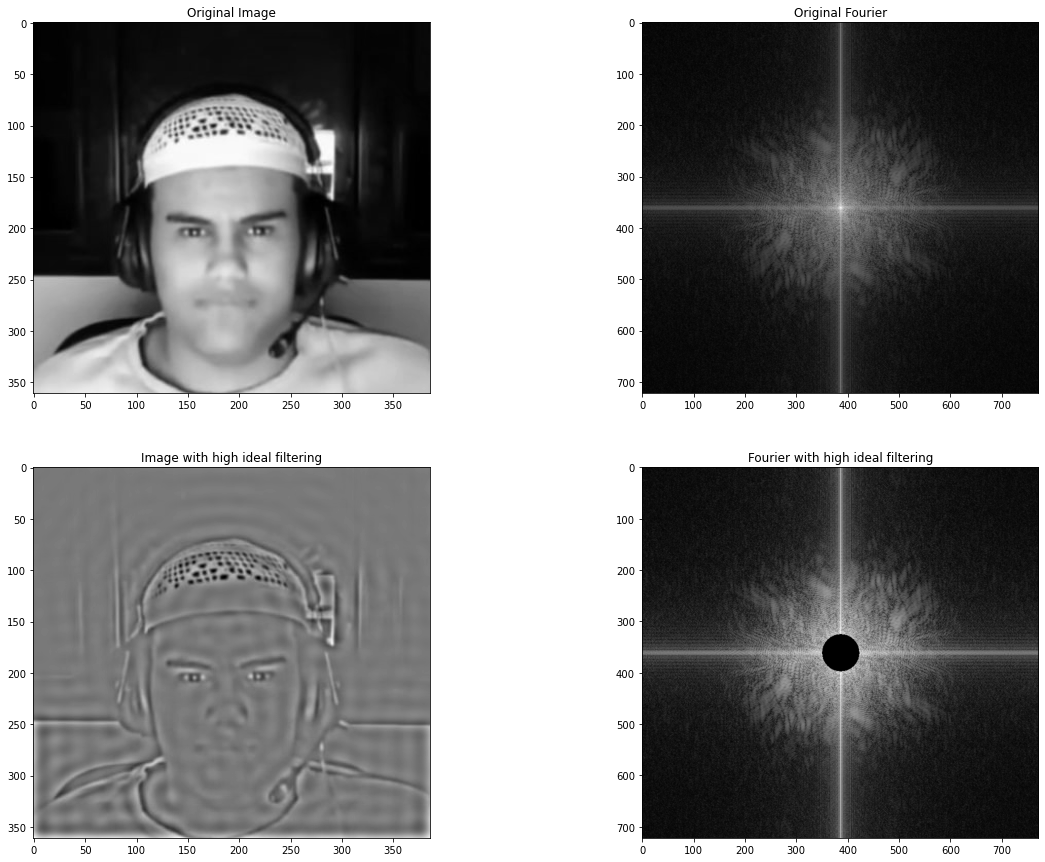

In [25]:
h = hpfilter('ideal', w, l, 0.05 * w)

f = fp.fft2(ori_img, (w,l))

lowpass_img = h * f

lowp_image = fp.ifft2(lowpass_img).real
lowp_image = lowp_image[:ori_img.shape[0],:ori_img.shape[1]]

fc = fp.fftshift(f)
fcf = fp.fftshift(lowpass_img)

s1 = np.log(1+abs(fc))
s2 = np.log(1+abs(fcf))

plt.figure(figsize =(20 , 15))
plt.subplot(2 , 2, 1); plt.imshow(ori_img, cmap='gray')
plt.title("Original Image")

plt.subplot(2 , 2, 2); plt.imshow(s1, cmap='gray')
plt.title("Original Fourier")

plt.subplot(2 , 2, 3); plt.imshow(lowp_image, cmap='gray')
plt.title("Image with high ideal filtering")

plt.subplot(2 , 2, 4); plt.imshow(s2, cmap='gray')
plt.title("Fourier with high ideal filtering")
plt.show()

### Penjelasan
Ketika dilakukan high-pass filtering, banyak hal yang hilang seperti *brighntess* dan detail umum lainny. Akan tetapi, detail cari ditra masih tampak. Dari gambar di atas dapat dilihat detail seperti mata, mulut, hidung, dan bahkna topi masih dapat terlihat. Ketika diameter diperbesar, banyak detail semakin hilang dan detail yang tetap ada adalah yang paling penting dalam citra.

## 1.d. Analisis D0

Dalam domain frekuensi, D0 mempengaruhi ukuran lingkaran yang ada. Lingkaran ini, tergantung pada filtering, dapat menghilangkan atau mengisolasikan frekuensi domain tinggi dengan frekuensi domain rendah. Filtering ini mempengaruhi hasil image pada domain spasial. 

Untuk low pass filtering, bila diameter dari filter diperkecil, gambar menjadi semakin tidak detail. filtering ini mirip dengan gaussian blur akan tetapi domain yang dipengaruhi adalah domain frekuensi.

Untuk high pass filtering, ketika diameter diperbesar, banyak detail semakin hilang dan detail yang tetap ada adalah yang paling penting dalam citra. Filter ini mirip dengan edge detection akan tetapi domain yang dipengaruhi adalah domain frekuensi.

## Nomor 2

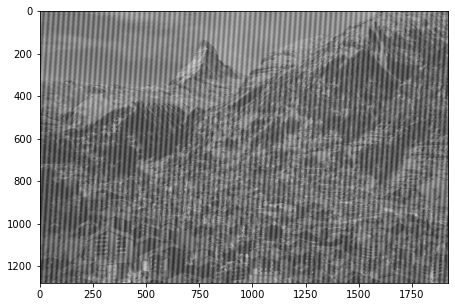

In [7]:
swiss_img = color.rgb2gray(io.imread('./swiss.jpg', pilmode = 'RGB'))
plt.figure(figsize =(10 , 5))
plt.imshow(swiss_img, cmap='gray')
plt.show()

## 1.a Dalam Frekuensi Domain

In [26]:
img_ft = fp.fft2(swiss_img)
ft_norm = abs(img_ft)
ft_scale = np.log(1+ft_norm)
ft_shift = fp.fftshift(ft_scale)

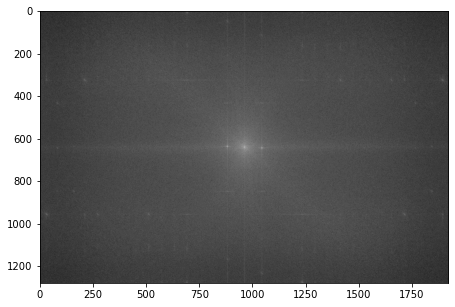

In [27]:
plt.figure(figsize =(10 , 5))
plt.imshow(ft_shift, cmap='gray')
plt.show()

## 1.b Noise Reduction

Text(0.5, 1.0, 'Frequency Domain')

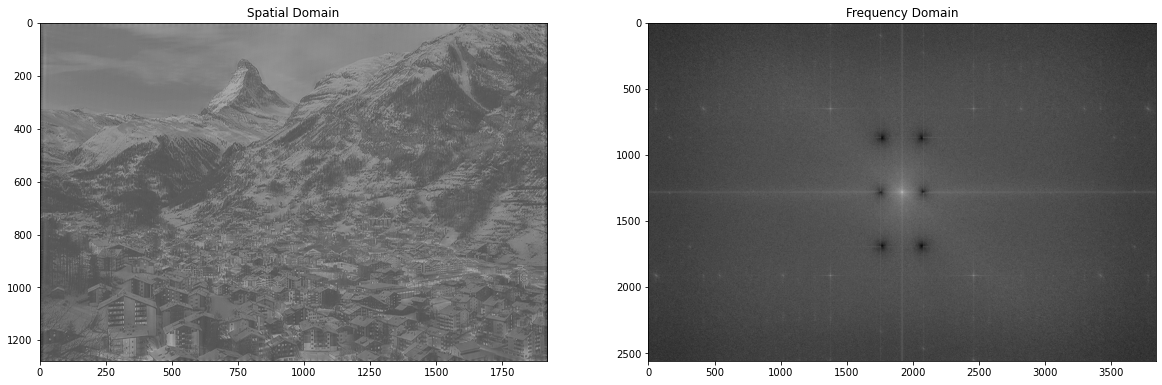

In [32]:
w, l = paddedsize(swiss_img.shape[0], swiss_img.shape[1])

F = fp.fft2(util.img_as_float(swiss_img), (w,l))

Fc = fp.fftshift(F)
s1 = np.log(1+abs(Fc))

h1 = notch('btw', w, l, 70, -160, 0)
h2 = notch('btw', w, l, 70, 160, 0)

h3 = notch('btw', w, l, 70, -150, -410)
h4 = notch('btw', w, l, 70, 150, -410)

h5 = notch('btw', w, l, 70, -150, 410)
h6 = notch('btw', w, l, 70, 150, 410)

Fs_image = F*h1*h2*h3*h4*h5*h6

F_image = fp.ifft2(Fs_image).real
F_image = F_image[:swiss_img.shape[0], :swiss_img.shape[1]]

fcf = fp.fftshift(Fs_image)
s2 = np.log(1+abs(fcf))

plt.figure(figsize =(20 , 15))
plt.subplot(1 , 2, 1); plt.imshow(F_image, cmap='gray')
plt.title("Spatial Domain")

plt.subplot(1 , 2, 2); plt.imshow(s2, cmap='gray')
plt.title("Frequency Domain")

### Penjelasan
Untuk melakukan *Noise Reduction*, Saya menggunakan *Notch Filtering*. Filter ini menghilangkan noise pada posisi yang ditentukan dalam domain frekuensi. Untuk menghilangkan noise pada image di atas, saya menggunakan 6 titik yang keenamnya menghilangkan noise pada citra sehingga menjadi tampak lebih jelas.

## 1.c. Perbandingan

Text(0.5, 1.0, 'Frequency Domain Filtered')

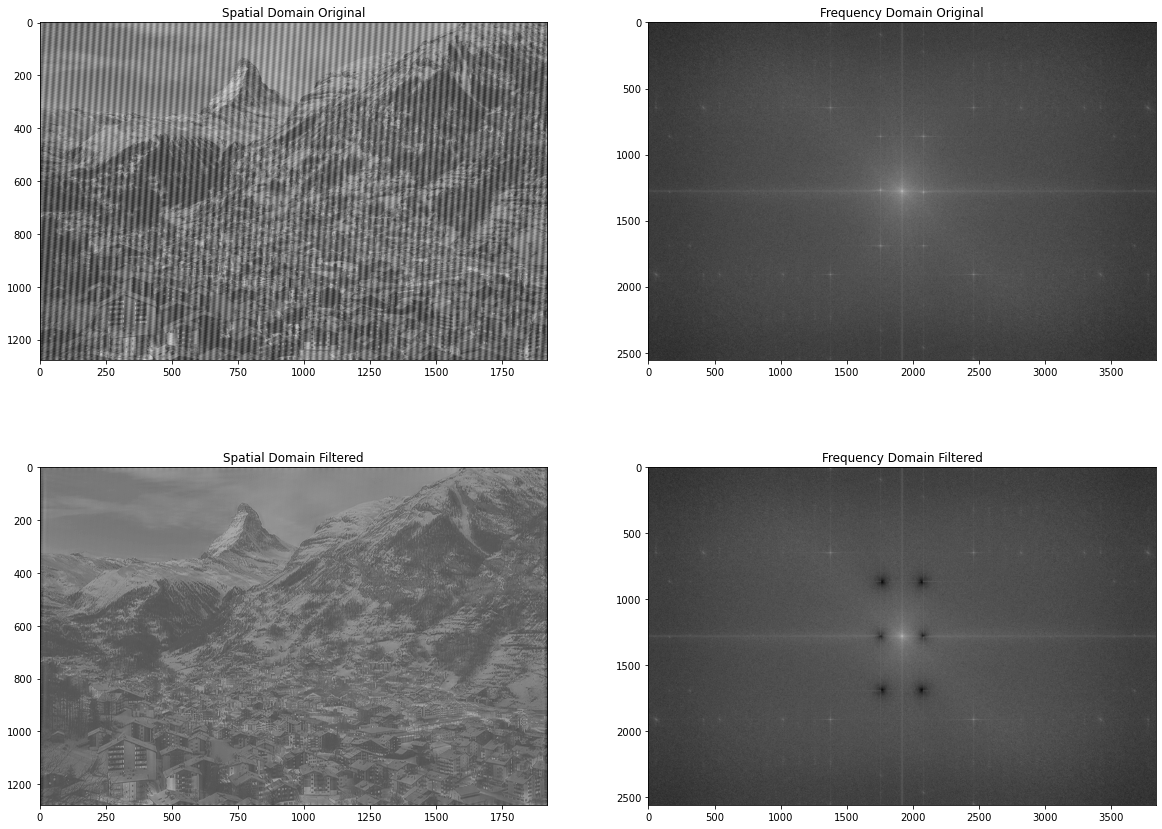

In [35]:
plt.figure(figsize =(20 , 15))
plt.subplot(2 , 2, 1); plt.imshow(swiss_img, cmap='gray')
plt.title("Spatial Domain Original")

plt.subplot(2, 2, 2); plt.imshow(s1, cmap='gray')
plt.title("Frequency Domain Original")

plt.subplot(2 , 2, 3); plt.imshow(F_image, cmap='gray')
plt.title("Spatial Domain Filtered")

plt.subplot(2 , 2, 4); plt.imshow(s2, cmap='gray')
plt.title("Frequency Domain Filtered")

### Perbandingan
Dapat dilihat bahwa dibandingkan *original image*, gambar hasil filter terlihat lebih jelas dan tidak memiliki noise. Pola yang tadinya ada di gambar awal sudah hilang meskipun masih terlihat sedikit pola bila diperhatikan. Dengan melakukan *notch filtering* pada domain frekuensi, kita mempengaruhi citra pada domain spasial juga, sama seperti low pass dan high pass filtering.